# CaseStudy on Probability

Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

In [5]:
#Importing relevant libraries

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [8]:
#Reading the dataset

In [9]:
data= pd.read_csv(r'C:\Users\user\Downloads\mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# Performing general analysis

In [12]:
data.shape

(8124, 23)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Insights
-- Dataset contains 8124 rows and 23 columns.

-- There are no null values in the dataset.

-- The data is categorical.

In [16]:
# Label encoding
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [17]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [18]:
# The column “veil-type” is 0 and not contributing to the data.
data = data.drop('veil-type', axis=1)

<AxesSubplot:>

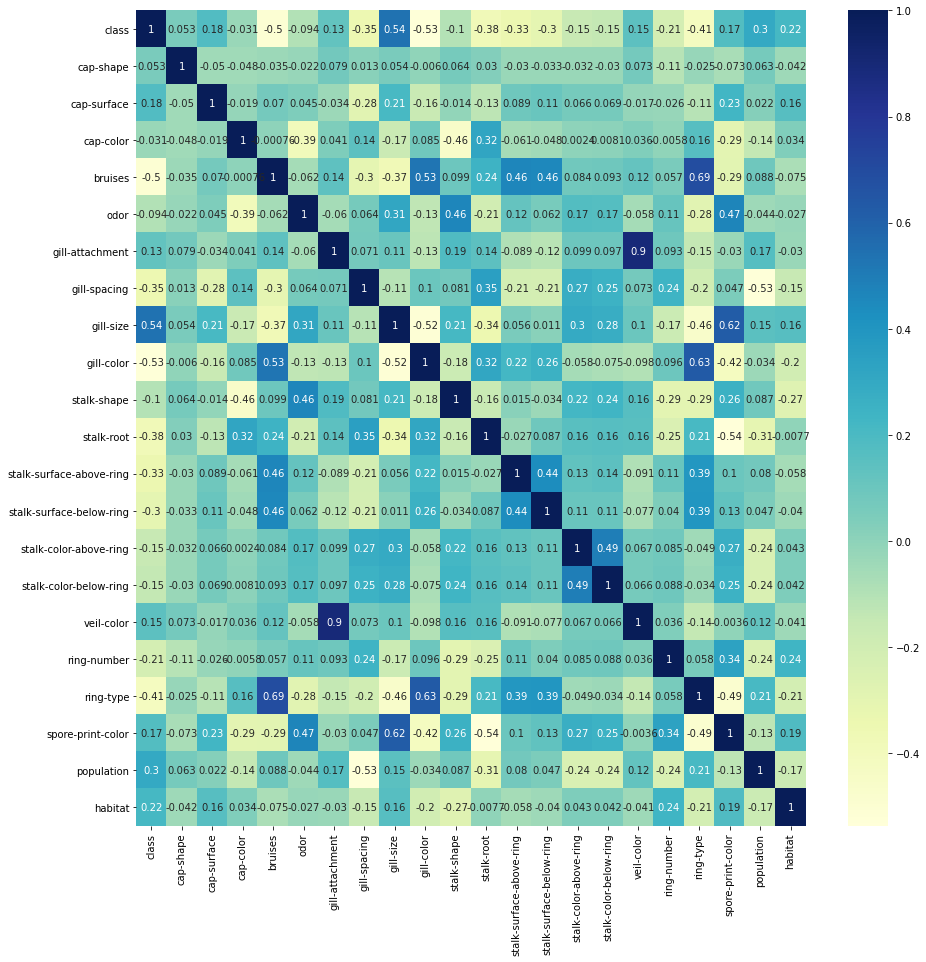

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [20]:
#splitting into feature set and class labels

In [21]:
x = data.drop('class', axis=1)
y=data['class']

In [22]:
#splitting the dataset into the Training set and Test set

In [23]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [24]:
# Feature Scaling

In [25]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
#KNN
acc_values= []
neighbors= np.arange(1,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

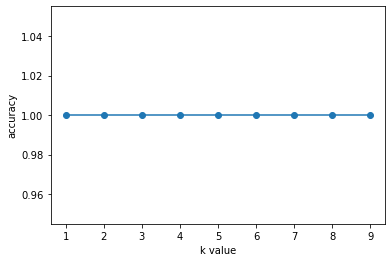

In [27]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [29]:
# Decision Tree Classifier
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred= dt_model.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [30]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [31]:
# Linear SVM Classifier
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 0.9886755292959133


In [32]:
# Polynomial SVM
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [33]:
# Radial SVM
svm_rad = SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pred=svm_rad.predict(x_test)
print("Accuracy is:", accuracy_score(y_test, y_pred))

Accuracy is: 1.0


In [34]:
# Fitting Gaussian Naive Bayes to the Training Set:

In [35]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy is:", accuracy_score(y_test,y_pred))

Accuracy is: 0.9266371245691778


In [36]:
# Fitting Bernoulli Nave Bayes to the Training Set

In [37]:
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
print("Accuracy is:", accuracy_score(y_test,y_pred))

Accuracy is: 0.897095027080256


# Insights
-- Most of the classification methods have 100% accuracy with this dataset.